**Table of contents**  
* Introduction  

* DNN; Deep Neural Network  

* CNN; Convolutional Neural Network

# Introduction
[PyTorch Tutorials](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#loading-a-dataset)  
**Dataset: [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST)**  
> The Fashion MNIST dataset is a large freely available database of fashion images that is commonly used for training and testing various machine learning systems.  
Fashion-MNIST was intended to serve as a replacement for the original MNIST database for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.  
The dataset contains **70,000 28x28 grayscale images** of fashion products from **10 categories** from a dataset of Zalando article images, with 7,000 images per category.  
The **training set consists of 60,000 images** and the **test set consists of 10,000 images**. The dataset is commonly included in standard machine learning libraries.

**Framework**  
* PyTorch: Version `2.1.0+cuda12.1`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.26.4`
* Pandas: Version `2.2.2`

# DNN; Deep Neural Network

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms # for preprocessing
from torch.utils.data import Dataset, DataLoader

In [3]:
# gpu가 사용 가능하면 torch가 gpu를 사용하도록 설정, 불가하면 cpu를 사용
torch.device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'torch is running with [{torch.device}]')

torch is running with [cuda:0]


In [4]:
# load the sample dataset 'FashionMNIST'
# 해당 dataset은 애초에 train용, test용이 나눠져 있음

# Convert PIL image format to tensor
transform = transforms.ToTensor()
# download & load the dataset
# 초기 다운로드시 100%가 4개이면 모두 완료된 것임
train_dataset = torchvision.datasets.FashionMNIST(root='./dataset',
                                                  train=True,
                                                  download=True,
                                                  transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./dataset',
                                                 train=False,
                                                 download=True,
                                                 transform=transform)

# cf. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#loading-a-dataset

**cf. `ToTensor()`**  
[ToTensor](https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html#totensor) converts a PIL image or Numpy `ndarray` into a `FloatTensor`. and scales the image's pixel intensity values in the range [0., 1.]

In [5]:
# download & load 확인
print(train_dataset)
print(test_dataset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./dataset
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test
    StandardTransform
Transform: ToTensor()


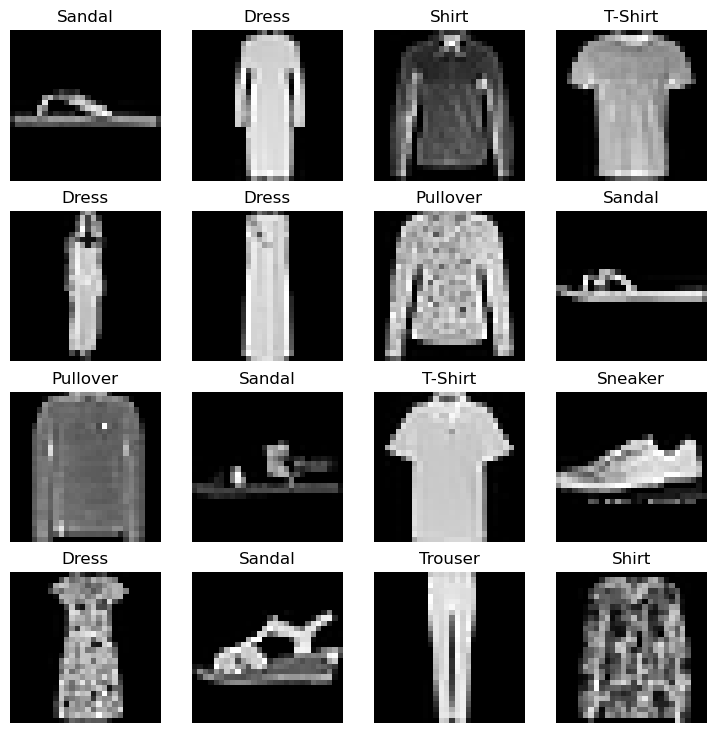

In [6]:
# Visualizing the dataset

# label(0~9)에 따른 제품명 mapping
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'}

figure = plt.figure(figsize=(9, 9))
cols, rows = 4, 4

# train_dataset의 sample을 무작위로 4*4개 만큼 골라서 visualize
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i) # 각 sample을 subplot으로 추가
                                      # 1개의 큰 mainplot 안에 4*4개의 subplot
    plt.title(labels_map[label]) # 각 subplot에 적용됨
    plt.axis('off') # 축 범위 표시 off
    # img.shape == (1, 28, 28) == (channel, height, width)임
    # .squeeze()는 tensor의 dimension중 size가 1인 dimension을 제거함
    # 따라서 img.squeeze() == (28, 28) == (height, width) 즉, 2-dim tensor
    # plt.imshow()는 2-dim array를 visualize함
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [7]:
# cf. dataset의 sample 구성
# dataset은 2-dimension으로 구성되어 있음
# [0]은 샘플의 index, [1]은 해당 샘플의 label
print(train_dataset[100][1]) # index 100 sample의 label == target
print(len(train_dataset)) # 총 sample 수
print(len(train_dataset[100][0][0])) # height pixel. 28
print(len(train_dataset[100][0][0][27])) # width pixel. 28
print(train_dataset[100][0]) # sample data

8
60000
28
28
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0000, 0.0000, 0.0706, 0.4196, 0.4667, 0.4039,
          0.0353, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.3882, 0.6078, 0.4431, 0.2392, 0.4627,
          0.6784, 0.4588, 0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0000, 0.4314, 0.5333, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.6549, 0.6235, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0235,
          0.0000, 0.2824, 0.5765, 0.0000, 0.0000, 0.0196, 0.0000, 0.0078,
          0.0000, 0.0000, 0.6824, 0.4627, 0

In [8]:
# 기존 label
print('기존 label:', train_dataset[100][1])

기존 label: 8


In [9]:
# label을 one-hot encoding

# features에 대한 transform.
transform = transforms.ToTensor()
# label에 대한 transform. one-hot encoding
# PyTorch 연산 편의를 위해 int가 아닌 float로 변환해야됨
target_transform = transforms.Lambda(
    lambda y: torch.zeros(10, dtype=torch.float32).scatter_(
        0, torch.tensor(y), value=1))

train_dataset = torchvision.datasets.FashionMNIST(root='./dataset',
                                                  train=True,
                                                  download=True,
                                                  transform=transform,
                                                  target_transform=target_transform)

# 위에서 이미 train dataset 다운했으므로 추가 다운로드 없이 기존 파일에서 transform진행
# cf. https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html#totensor

In [10]:
# 위 과정을 test_dataset에도 적용
test_dataset = torchvision.datasets.FashionMNIST(root='./dataset',
                                                  train=False,
                                                  download=True,
                                                  transform=transform,
                                                  target_transform=target_transform)

**cf. Lambda Transforms**  
Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor.  
It first creates a zerp tensor of size 10(the number of labels in our dataset) and calls scatter_ which assigns a value=1 on the index as given by the label y.

**cf. `transforms.Lambda()`를 사용한 one-hot encoding 자세히 알아보기**  

* 기존 label(=y)은 0 ~ 9의 int값을 가졌다는 것을 기억하자.

* `import torchvision.transforms as transforms`  
  dataset에 대한 여러 preprocessing을 지원한다.
  
* `transforms.Lambda()`  
  user-defined lambda function을 tensor 객체에 적용할 수 있도록 해준다.

* `lambda y: `
  y(label, 0~9)를 입력받아서 이어지는 명령들을 수행한다.

* `torch.zeros(10, dtype=torch.float32)`  
  length가 10이고, dtype이 torch.float32인 tensor(array)를 만들어서 zeros로 채운다.
  ```python
  # cf.
  torch.zeros(10, dtype=torch.float32)
  > tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
  ```

* `.scatter_(0, torch.tensor(y), value=1))`
  - `torch.tensor(y)`: 입력받은 y(int)를 tensor로 바꾼다.
    ```python
    # cf.
    y = 8
    torch.tensor(y)
    > tensor(8)
    ```
  - `Tensor.scatter(dim, index, src)`  
    Tensor 객체(위에서 만든 `tensor([0., 0., ..., 0.])`을 의미)의 `dim`에 대해서 `index`에 해당하는 값을 `src` 값으로 덮어쓴다.  
    (cf. PyTorch에서 dim=0이면 row, dim=1이면 column)

In [11]:
# cf. 위의 cf.를 참고할 것.
# train_dataset[100][1] 즉, sample index가 100인 sample의 label(y)는 8(int)이었음.
# transforms.Lambda()에 의해서 8번 째 index의 0만 1.(float)으로 덮어쓰고, 나머지는 0으로 유지.
# 따라서 one-hot encoding됨.
print('one-hot encoded label:', train_dataset[100][1])
# one-hot encoded vector로부터 본래 label 추출
print('label mapping:', torch.argmax(train_dataset[100][1]))

one-hot encoded label: tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
label mapping: tensor(8)


In [12]:
# dataset을 dataloader에 batch size만큼씩 전달
# train_loader = torch.utils.data.DataLoader(train_dataset,
#                                            batch_size=600)
# test_loader = torch.utils.data.DataLoader(test_dataset,
#                                           batch_size=100)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=600)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=100)

In [13]:
# create the model(DenseLayerNeuralNetwork)
class FashionDNN(nn.Module):
    def __init__(self):
        # FashionDNN의 super class(= nn.Module)의 `__init__ method call
        super(FashionDNN, self).__init__()
        # pixel. 28 * 28 = 784
        self.layer1 = nn.Linear(in_features=784, out_features=256)
        # self.drop = nn.Dropout(0.25)
        self.layer2 = nn.Linear(in_features=256, out_features=128)
        # label. 0 ~ 9 총 10개
        self.layer3 = nn.Linear(in_features=128, out_features=10)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# torch.device가 'cuda'여도 .to(torch.device) 안 해주면
# 기본적으로 model은 cpu에 생성됨
model = FashionDNN().to(torch.device)
print(f'model running on {torch.device}')

model running on cuda:0


In [14]:
# model 확인
model

FashionDNN(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [15]:
# cf. predict 예제
X = torch.rand(1, 28, 28, device=torch.device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f'Predicted class: {y_pred}')

Predicted class: tensor([1], device='cuda:0')


In [16]:
# define the LossFunction and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.004)

In [17]:
num_epochs = 20
count = 0
for epoch in range(num_epochs):
    count = 0
    # images, labels 둘 다 tensor 객체
    for images, labels in train_loader:
        images, labels = images.to(torch.device), labels.to(torch.device)

        # train = Variable(images.view(100, 1, 28, 28))
        # labels = Variable(labels)

        model.train()
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        count += 1

        if not (count % 10):
            print(f'Epoch [{epoch+1}/{num_epochs}], Loader count [{count}], Loss: {loss.item():.4f}')
            
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loader count [10], Loss: 0.9934
Epoch [1/20], Loader count [20], Loss: 0.8144
Epoch [1/20], Loader count [30], Loss: 0.6848
Epoch [1/20], Loader count [40], Loss: 0.5502
Epoch [1/20], Loader count [50], Loss: 0.5861
Epoch [1/20], Loader count [60], Loss: 0.5128
Epoch [1/20], Loader count [70], Loss: 0.4411
Epoch [1/20], Loader count [80], Loss: 0.4424
Epoch [1/20], Loader count [90], Loss: 0.5017
Epoch [1/20], Loader count [100], Loss: 0.4013
Epoch [1/20], Loss: 0.4013
Epoch [2/20], Loader count [10], Loss: 0.4238
Epoch [2/20], Loader count [20], Loss: 0.4375
Epoch [2/20], Loader count [30], Loss: 0.4508
Epoch [2/20], Loader count [40], Loss: 0.3936
Epoch [2/20], Loader count [50], Loss: 0.4485
Epoch [2/20], Loader count [60], Loss: 0.3930
Epoch [2/20], Loader count [70], Loss: 0.3386
Epoch [2/20], Loader count [80], Loss: 0.3629
Epoch [2/20], Loader count [90], Loss: 0.3942
Epoch [2/20], Loader count [100], Loss: 0.3594
Epoch [2/20], Loss: 0.3594
Epoch [3/20], Loader cou

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# 경고 무시
warnings.filterwarnings("ignore", category=UserWarning, module="torch")

model.eval()
count = 0
with torch.no_grad():
    for images, labels in test_loader:
        count += 1
        images, labels = images.to(torch.device), labels.to(torch.device)

        y_pred = model(images)
        y_pred_class = torch.argmax(y_pred, dim=1)
        y_pred_probs = torch.softmax(y_pred, dim=1)

        # sklearn.metrics에서는 numpy로 변환하여 작업을 하는데,
        # 'cpu'에 있는 tensor만 numpy로 변환 가능함
        y_pred_class = y_pred_class.to('cpu')
        y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')

        print(f'<<<test count: [{count}/100]>>>')
        print(classification_report(y_test_class, y_pred_class, zero_division=0))
        print(confusion_matrix(y_test_class, y_pred_class))
        print()
        print()



C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.arg

<<<test count: [1/100]>>>
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00        13
           2       0.73      0.79      0.76        14
           3       1.00      0.67      0.80         9
           4       0.75      0.60      0.67        10
           5       0.82      1.00      0.90         9
           6       0.55      0.75      0.63         8
           7       0.90      0.82      0.86        11
           8       1.00      1.00      1.00        12
           9       0.80      0.67      0.73         6

    accuracy                           0.84       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.85      0.84      0.84       100

[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  3  0  0  0]
 [ 0  0  0  6  2  0  1  0  0  0]
 [ 0  0  3  0  6  0  1  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 1  0  1  0  0 

C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.arg

<<<test count: [21/100]>>>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       0.75      0.50      0.60        12
           3       0.92      0.85      0.88        13
           4       0.50      0.78      0.61         9
           5       1.00      0.71      0.83         7
           6       0.89      0.89      0.89         9
           7       0.86      0.92      0.89        13
           8       1.00      1.00      1.00        10
           9       0.92      1.00      0.96        12

    accuracy                           0.86       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.86      0.86       100

[[ 6  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  5  0  1  0  0  0]
 [ 0  0  0 11  2  0  0  0  0  0]
 [ 0  0  1  1  7  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  2  0  0]
 [ 0  0  1  0  0

C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.arg

<<<test count: [32/100]>>>
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00         8
           2       0.80      1.00      0.89         8
           3       1.00      0.78      0.88         9
           4       0.73      0.89      0.80         9
           5       1.00      0.83      0.91         6
           6       0.92      0.80      0.86        15
           7       0.89      1.00      0.94        16
           8       1.00      0.92      0.96        13
           9       0.86      1.00      0.92         6

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100

[[ 9  0  0  0  1  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  7  1  0  0  1  0  0]
 [ 0  0  0  0  8  0  1  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  1]
 [ 0  0  2  0  1

C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.arg

<<<test count: [43/100]>>>
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       1.00      1.00      1.00         6
           2       0.86      0.95      0.90        19
           3       1.00      1.00      1.00         6
           4       0.75      0.50      0.60         6
           5       0.88      1.00      0.93         7
           6       0.69      0.69      0.69        13
           7       1.00      0.91      0.95        11
           8       1.00      0.85      0.92        13
           9       1.00      1.00      1.00         7

    accuracy                           0.88       100
   macro avg       0.90      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

[[11  0  0  0  0  0  1  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  1  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 0  0  2  0  3  0  1  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 3  0  1  0  0

C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.arg

<<<test count: [54/100]>>>
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       1.00      0.86      0.92         7
           2       0.67      0.67      0.67         3
           3       0.67      0.80      0.73         5
           4       0.80      0.80      0.80        15
           5       0.91      1.00      0.95        10
           6       0.44      0.80      0.57         5
           7       1.00      0.93      0.97        15
           8       1.00      0.88      0.94        17
           9       0.93      1.00      0.96        13

    accuracy                           0.87       100
   macro avg       0.84      0.84      0.83       100
weighted avg       0.90      0.87      0.88       100

[[ 7  0  0  1  0  1  1  0  0  0]
 [ 0  6  0  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  1  0  0  0]
 [ 0  0  0  4  1  0  0  0  0  0]
 [ 0  0  1  0 12  0  2  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  1

C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.arg

<<<test count: [64/100]>>>
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       1.00      0.93      0.96        14
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      0.92      0.96        12
           6       0.90      0.75      0.82        12
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         9
           9       0.90      1.00      0.95         9

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100

[[ 5  0  1  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  1  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  1]
 [ 2  0  1  0  0

C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.arg

<<<test count: [75/100]>>>
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       1.00      1.00      1.00        11
           2       0.88      0.78      0.82         9
           3       0.90      1.00      0.95         9
           4       0.90      0.90      0.90        10
           5       1.00      0.91      0.95        11
           6       0.92      0.92      0.92        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        12
           9       0.92      1.00      0.96        12

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

[[ 6  0  0  1  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  1  0  1  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0]
 [ 0  0  1  0  9  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  1]
 [ 1  0  0  0  0

C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.arg

<<<test count: [86/100]>>>
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00        12
           2       1.00      0.73      0.84        11
           3       1.00      1.00      1.00         8
           4       0.80      0.73      0.76        11
           5       0.86      0.86      0.86         7
           6       0.62      0.80      0.70        10
           7       0.86      0.92      0.89        13
           8       1.00      1.00      1.00        12
           9       0.88      0.78      0.82         9

    accuracy                           0.88       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.88      0.88       100

[[ 7  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  1  0  2  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  3  0  0  0]
 [ 0  0  0  0  0  6  0  1  0  0]
 [ 1  0  0  0  1

C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.argmax(torch.tensor(labels, dtype=torch.int64), dim=1).to('cpu')
C:\Users\komando\AppData\Local\Temp\ipykernel_40124\3316531946.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_class = torch.arg

## cf. Neural Network Class를 만드는 또 다른 방법

In [23]:
# new solution
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        
model_test_1 = NeuralNetwork().to(torch.device)

In [24]:
# legacy solution
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN, self).__init__()
        self.layer1 = nn.Linear(in_features=784, out_features=256)
        self.layer2 = nn.Linear(in_features=256, out_features=128)
        self.layer3 = nn.Linear(in_features=128, out_features=10)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x
        
model_test_2 = FashionDNN().to(torch.device)

In [22]:
# compare the ouput between new and legacy solution
print(model_test_1)
print(model_test_2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)
FashionDNN(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
)


(위 cell)  
`model`을 호출하는 경우, `__init__`에서 정의된 것들만 리턴한다.  

`NeuralNetwork`의 경우, `x`가 Neural Network를 통과하는 과정 순서대로 확인할 수 있다 즉, 가독성이 높다.  
`FashionDNN`의 경우, 그렇지 않다.  
> 다만 전자가 후자보다 무조건적으로 좋은 것은 아니라고 하는데, 이와 관련한 부분은 지금 레벨에서는 몰라도 되겠다.

**cf. `nn.Sequential`**  
[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can user sequential containers to put together a quick network.

# CNN; Convolutional Neural Network